# Text Smilarity

## Cosine Similarity

Kosinüs benzerliği, iki vektör arasındaki açının kosinüsünü hesaplayarak vektörlerin birbirlerine olan benzerliklerini ölçmemize olanak sağlayan bir uzaklık ölçüsüdür.

Kosinüs benzerliği büyüklük değil yönelim ölçüsür. 

   - Aynı yönelimdeki iki vektör arasındaki açının kosinüs değeri 1'e yakındır.
   - Vektörlerin birbirine ortogonal olduğu durumda ise iki vektör arasındaki açının kosinüs değeri 0'a yakındır
   - Birbirine taban tabana zıt iki vektör için ise kosinüs değeri -1e yakındır.

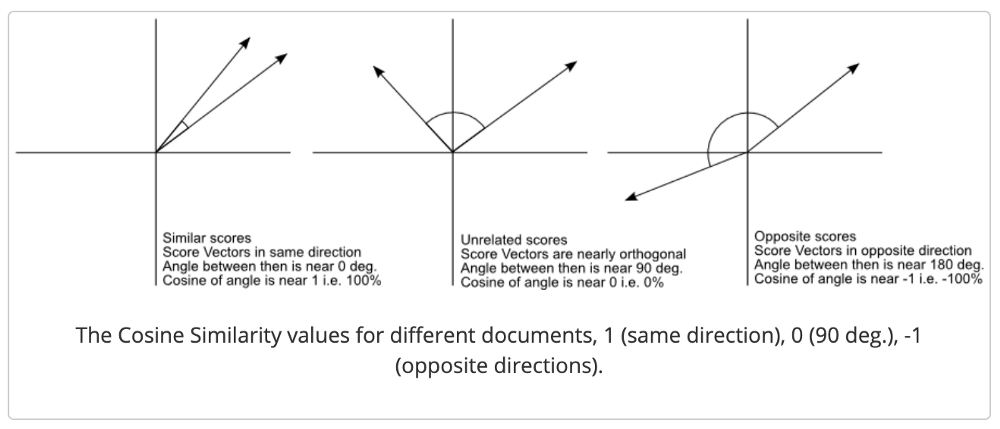

Her biri bir cümleyi temsil eden iki vektörümüz olduğunu varsayalım. Bu bağlamda, bu iki vektör, iki cümlenin kelime sayısını içeren dizilerdir. 
Her boyutun belgedeki bir kelimeye karşılık geldiği çok boyutlu bir uzayda, kosinüs benzerliği belgelerin büyüklüğünü değil yönünü yakalar. Vektörler arasındaki açı ne kadar küçük ise iki cümlenin birbirine o derece benzer olduğunu varsyabiliriz.
İki benzer belge, boyutlarından ötürü Öklid mesafesine göre çok uzak olsalar dahi  belgelere ait vektörler küçük bir açıya sahip olabilir. (Örneğin "televizyon" kelimesi bir belgede 30 kez, başka bir belgede 5 kez geçebilir.)



![image.png](https://raw.githubusercontent.com/aslicerman/Text_Similarity_From_Scratch/main/Text_Similarity_2.png?token=AR6W6BYJW2WF6RMEMSOVTITBJLWWI)
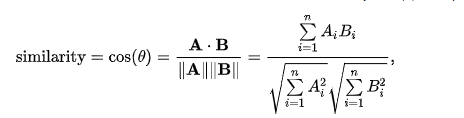

Öncelikle sırasıya kısaca kosinüs benzerlik hesaplamasının bileşenlerini inceleyelim.

**Dot product :** 

- Dot product bir vektör çarpma yöntemidir. Dot product ile iki vektörün değerlerinin çarpımının toplamına eşit olan skalar bir değer elde ederiz.

![image.png](https://raw.githubusercontent.com/aslicerman/Text_Similarity_From_Scratch/main/Text_Similarity_3.png?token=AR6W6B7LTAPWCWFTSL3KAWLBJLW3C)
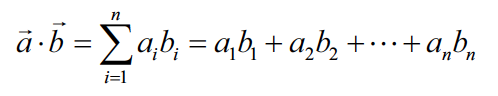

**Vektör Uzunluğu :**

- Vektör uzunluğu hesaplaması ise Pisagor teoreminden gelmektedir. Aşağıdaki gibi basit bir şekilde hesaplayabiliriz.

![image.png](https://raw.githubusercontent.com/aslicerman/Text_Similarity_From_Scratch/main/Text_Similarity_4.png?token=AR6W6B6FZYCY3QFUP6HXLNLBJLW6S)
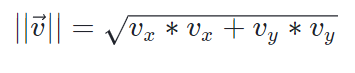

Formüldeki bileşenleri yerlerine yerleştirdiğimzde **a =[1,1,0]** ve **b =[1,0,1]** vektörleri arasındaki kosinüs benzerliğini aşağıdaki gibi hesaplayoruz.

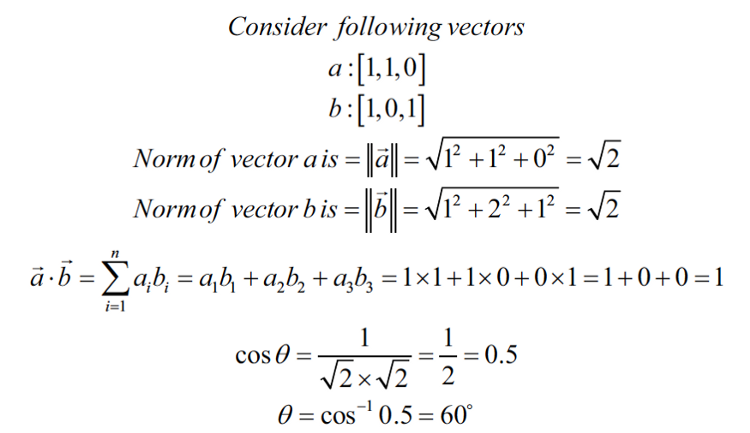

Kosinüs benzerliği için cümleleri vektörlere dönüştürmemiz gerekiyor. Bunu yapmanın bir yolu, ya Bag of Words ya da TF-IDF  kullanmaktır. Diğer bir yol, kelimeleri vektörlere dönüştürmek için Word2Vec gibi word embeddings yöntemlerini kullanmaktır.

**Bag of Words / tf-idf ile word embeddings arasında iki temel fark vardır:**


- 1. TF / TF-IDF kelime başına bir sayı oluşturur, word embeddings genellikle kelime başına bir vektör oluşturur.

- 2. TF / TF-IDF, belgeleri bir bütün olarak sınıflandırmak için iyidir, ancak word embeddings bağlamsal içeriği tanımlamak için iyidir.

In [1]:
import pandas as pd
import numpy as np
import re
import requests
from bs4 import BeautifulSoup

import nltk
WPT = nltk.WordPunctTokenizer()

import spacy
from spacy.lang.tr import Turkish
nlp = Turkish()

### Beautifulsoup Vikipedi Parsing

In [2]:
def viki_intro(page_name):
    request = requests.get('https://tr.wikipedia.org/wiki/'+page_name).content
    if request is not None:
        soup = BeautifulSoup(request, 'html.parser')
        title = soup.select("#firstHeading")[0].text
        paragraphs = soup.select("p")
        intro = '\n'.join([ para.text for para in paragraphs[1:2]])
    return title, intro


In [3]:
page_list = ["Yerdeniz_Büyücüsü", "Mülksüzler"]

def viki_df(page_list):
    Title = []; Intro = []
    for i in page_list:
        title, intro = viki_intro(i)
        Title.append(title)
        Intro.append(intro)
        df = pd.DataFrame(list(zip(Title, Intro)), columns =["Title","Intro"])
    return df

df = viki_df(page_list)
df.head()

,Title,Intro
0,Yerdeniz Büyücüsü,Yerdeniz Büyücüsü (İngilizce: A Wizard of Eart...
1,Mülksüzler,Mülksüzler Ursula K. Le Guin tarafından 1974't...


### NLP Preprocessing

In [4]:
def cleaning_text(text):
    text_nopunct = re.sub(r'[^\w\s]','', str(text).lower())
    text_nonumbers =re.sub('[0-9]+', '', str(text_nopunct))
    return text_nonumbers

In [5]:
# func. definition for getting the root of the each normalized text
def lemma(Text):
    Lemma=[]
    doc= nlp(Text)
    for word in doc:
        Lemma.append(word.lemma_)
    return ' '.join(Lemma)

In [6]:
text_file = open("zemberek_stopwords.txt", "r")
stopwords_zemberek = text_file.read().split('\n')
len(stopwords_zemberek)

1797

In [7]:
def tokenize(text):
    tokens = WPT.tokenize(text)
    return tokens

In [8]:
df.loc[:,'Intro_Preprocessing'] = df.loc[:,'Intro'].apply(lambda x: cleaning_text(x))

In [9]:
df.loc[:,'Intro_Preprocessing'] = df.loc[:,'Intro_Preprocessing'].apply(lambda x: lemma(x))

In [10]:
df.loc[:,'Intro_Preprocessing'] = df.loc[:,'Intro_Preprocessing']\
    .apply(lambda x: " ".join(x for x in str(x).split() if x not in stopwords_zemberek))

In [11]:
df.loc[:,'Intro_token'] = df.loc[:,'Intro_Preprocessing'].apply(lambda x: tokenize(x) )

In [12]:
df

,Title,Intro,Intro_Preprocessing,Intro_token
0,Yerdeniz Büyücüsü,Yerdeniz Büyücüsü (İngilizce: A Wizard of Eart...,yer büyücü ingilizce wizard earthsea amerikalı...,"[yer, büyücü, ingilizce, wizard, earthsea, ame..."
1,Mülksüzler,Mülksüzler Ursula K. Le Guin tarafından 1974't...,mülk ursula k le guin taraf te yaz ütopik bili...,"[mülk, ursula, k, le, guin, taraf, te, yaz, üt..."


# Scikit Learn- Cosine Similarity

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(df["Intro_Preprocessing"])
print('vocabulary: ', vectorizer.vocabulary_)

vocabulary:  {'yer': 27, 'büyücü': 5, 'ingilizce': 12, 'wizard': 24, 'earthsea': 7, 'amerikalı': 2, 'yazar': 26, 'ursula': 23, 'le': 16, 'guin': 10, 'taraf': 21, 'yaz': 25, 'roman': 19, 'ad': 0, 'kurgusal': 15, 'takımadada': 20, 'geç': 9, 'konu': 14, 'büyü': 4, 'büyücülük': 6, 'üst': 28, 'ol': 18, 'altı': 1, 'kitap': 13, 'hal': 11, 'gel': 8, 'mülk': 17, 'te': 22, 'ütopik': 29, 'bilimkurgu': 3}


In [14]:
print('idfs: ', vectorizer.idf_)
vector = vectorizer.transform(df["Intro_Preprocessing"])
print('vectors: ', vector.toarray())

idfs:  [1.40546511 1.40546511 1.40546511 1.40546511 1.40546511 1.40546511
 1.40546511 1.40546511 1.40546511 1.40546511 1.         1.40546511
 1.40546511 1.40546511 1.40546511 1.40546511 1.         1.40546511
 1.40546511 1.         1.40546511 1.         1.40546511 1.
 1.40546511 1.         1.40546511 1.40546511 1.40546511 1.40546511]
vectors:  [[0.17667331 0.17667331 0.17667331 0.         0.35334661 0.17667331
  0.17667331 0.17667331 0.17667331 0.17667331 0.12570451 0.17667331
  0.17667331 0.35334661 0.17667331 0.17667331 0.12570451 0.
  0.17667331 0.12570451 0.17667331 0.12570451 0.         0.12570451
  0.17667331 0.12570451 0.17667331 0.35334661 0.17667331 0.        ]
 [0.         0.         0.         0.37695709 0.         0.
  0.         0.         0.         0.         0.26820807 0.
  0.         0.         0.         0.         0.26820807 0.37695709
  0.         0.26820807 0.         0.26820807 0.37695709 0.26820807
  0.         0.26820807 0.         0.         0.         0.3769570

In [15]:
import pandas as pd
df_sim = pd.DataFrame(vector.toarray(), 
                  columns=vectorizer.get_feature_names(), 
                  index=['Makine_Öğrenimi', 'Istatistik'])
df_sim

,ad,altı,amerikalı,bilimkurgu,büyü,büyücü,büyücülük,earthsea,gel,geç,...,takımadada,taraf,te,ursula,wizard,yaz,yazar,yer,üst,ütopik
Makine_Öğrenimi,0.176673,0.176673,0.176673,0.000000,0.353347,0.176673,0.176673,0.176673,0.176673,0.176673,...,0.176673,0.125705,0.000000,0.125705,0.176673,0.125705,0.176673,0.353347,0.176673,0.000000
Istatistik,0.000000,0.000000,0.000000,0.376957,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.268208,0.376957,0.268208,0.000000,0.268208,0.000000,0.000000,0.000000,0.376957


In [16]:
from sklearn.metrics.pairwise import cosine_similarity
cosine = cosine_similarity(df_sim, df_sim)
np.fill_diagonal( cosine, 0 )
cosine

array([[0.        , 0.20228979],
       [0.20228979, 0.        ]])

# Cosine Similarity from Scratch

### Kendi kodlarınızla elde etmeniz beklenen sonuç:

### 1. Yöntem

In [17]:
#function was created to find the number of documents containing the word.
#for the denominator of the idf formula
def df_t(doc, word):
    return list(set(doc.split(" "))).count(word)

In [18]:
def tf_idf(docs, doc_index):
    tf = []
    idf = []
    #sci-kit learn tf idf does not count single characters
    unique_words =  [word for word in list(set(" ".join(docs).split(" "))) if len(word)>1]
    unique_words.sort()
    word_index =  dict(zip(unique_words, [i for i, j in enumerate(unique_words)]))

    word_count_d =  dict.fromkeys(unique_words, 0)  #number of documents containing the word
    for word in unique_words:   
        [word_count_d.update({word : word_count_d[word]+df_t(docs[i], word)}) for i in range(len(df))]
        tf.append(docs[doc_index].split(" ").count(word))   #word frequency (TF)
        idf.append(np.log((1+len(docs))/(1+word_count_d[word]))+1) # Number of doc / number of doc containing the word (IDF)

    tf_idf_raw = [tf[i] * idf[i] for i in range(len(tf))]     # tf * idf
    #Normalization by the Euclidean Norm
    tf_idf = (tf_idf_raw / np.sqrt(np.dot(tf_idf_raw, tf_idf_raw)))
    return idf, tf_idf, word_index

In [19]:
doc0_idf, doc0_tfidf, doc0_index = tf_idf(df["Intro_Preprocessing"],0)
doc1_idf, doc1_tfidf, doc1_index = tf_idf(df["Intro_Preprocessing"],1)

In [20]:
def cos_sim(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    norm_1 = np.linalg.norm(vector1)
    norm_2 = np.linalg.norm(vector2)
    return dot_product / (norm_1 * norm_2)

In [21]:
print(cos_sim(doc0_tfidf, doc1_tfidf))


0.20228978916264656


### Scikit-Learn Check

In [22]:
import pandas as pd
df = pd.DataFrame(vector.toarray(), 
                  columns=vectorizer.get_feature_names(), 
                  index=['Makine_Öğrenimi', 'Istatistik'])
df

,ad,altı,amerikalı,bilimkurgu,büyü,büyücü,büyücülük,earthsea,gel,geç,...,takımadada,taraf,te,ursula,wizard,yaz,yazar,yer,üst,ütopik
Makine_Öğrenimi,0.176673,0.176673,0.176673,0.000000,0.353347,0.176673,0.176673,0.176673,0.176673,0.176673,...,0.176673,0.125705,0.000000,0.125705,0.176673,0.125705,0.176673,0.353347,0.176673,0.000000
Istatistik,0.000000,0.000000,0.000000,0.376957,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.268208,0.376957,0.268208,0.000000,0.268208,0.000000,0.000000,0.000000,0.376957


In [23]:
from sklearn.metrics.pairwise import cosine_similarity
cosine = cosine_similarity(df, df)
np.fill_diagonal( cosine, 0 )
cosine

array([[0.        , 0.20228979],
       [0.20228979, 0.        ]])